<a href="https://colab.research.google.com/github/sayeh31/food-data-analisis/blob/main/dataanalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.ma import count
import datetime as dt
#import missingno as msno
from textwrap import wrap

In [ ]:
data=pd.read_csv("Data analyst Task.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       29057 non-null  int64  
 1   user_id        29057 non-null  int64  
 2   created_at     29057 non-null  object 
 3   discount_cost  29057 non-null  int64  
 4   discount_type  6925 non-null   float64
 5   basket         29057 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [ ]:
data

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


In [ ]:
def changedate(x):
    date_object = dt.datetime.strptime(x,"%m/%d/%Y").date()
    return date_object


In [ ]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)


In [ ]:
def prepare_data(data):
  data["created_at"]= data["created_at"].apply(changedate)
  data["month"]= data["created_at"].apply(get_month)
  data["cohort month"]= data.groupby("user_id")["month"].transform("min")
  return data

In [ ]:
def get_date_elements(df,column):
    month=df[column].dt.month
    year=df[column].dt.year
    return month,year

In [ ]:
def create_cohort_table_first(data):
  month,year=get_date_elements(data,"month")
  cohort_month,cohort_year=get_date_elements(data,"cohort month")
  year_dif=year -cohort_year
  month_dif=month-cohort_month
  data["cohort index"]=year_dif*12+month_dif+1
  cohort_data=data.groupby(["cohort month","cohort index"])["user_id"].apply(pd.Series.nunique).reset_index()
  cohort_table=cohort_data.pivot(index="cohort month",columns=["cohort index"],values="user_id")
  cohort_table=cohort_data.pivot(index="cohort month",columns=["cohort index"],values="user_id")

  return cohort_table

In [ ]:
def create_cohort_table_orders(data):
  month,year=get_date_elements(data,"month")
  cohort_month,cohort_year=get_date_elements(data,"cohort month")
  year_dif=year -cohort_year
  month_dif=month-cohort_month
  data["cohort index"]=year_dif*12+month_dif+1
  cohort_data=data.groupby(["cohort month","cohort index"])["user_id"].agg(count).reset_index()
  cohort_table=cohort_data.pivot(index="cohort month",columns=["cohort index"],values="user_id")
  cohort_table=cohort_data.pivot(index="cohort month",columns=["cohort index"],values="user_id")

  return cohort_table

In [ ]:
def visual_cohort_table(cohort_table):
  cohort_table.index=cohort_table.index.strftime("%B %Y")
  new=cohort_table.divide(cohort_table.iloc[:,0],axis=0)
  plt.figure(figsize=(12,6))
  sns.heatmap(new,annot=True,fmt='.0%')

In [ ]:
def visual_cohort_table_orders(cohort_table):
  cohort_table.index=cohort_table.index.strftime("%B %Y")
  plt.figure(figsize=(12,6))
  sns.heatmap(cohort_table,annot=True,fmt=".1f")

In [ ]:
data=prepare_data(data)

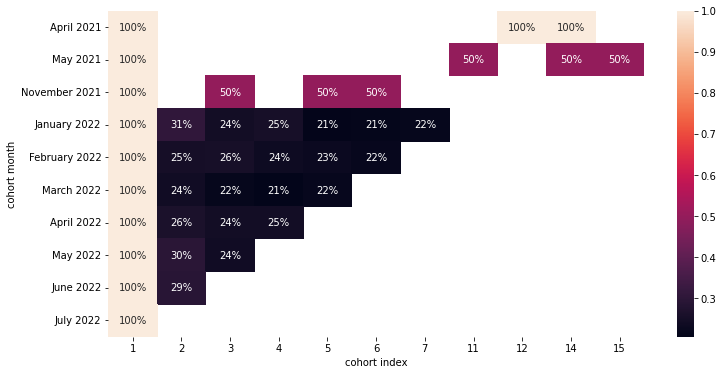

In [ ]:

visual_cohort_table(create_cohort_table_first(data))

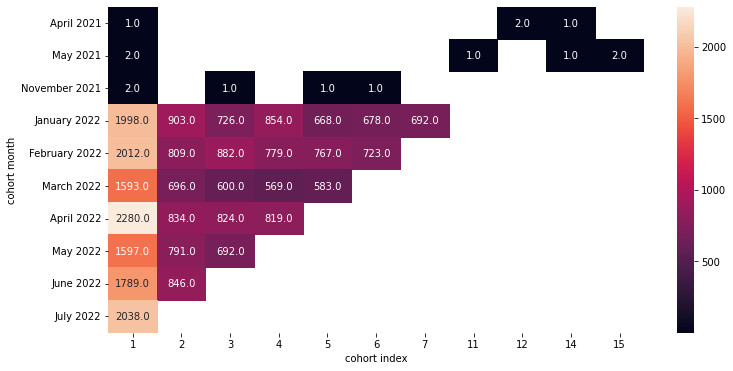

In [ ]:

visual_cohort_table_orders(create_cohort_table_orders(data))

# **discount results**



In [ ]:
first_order_data=data.groupby("user_id")["created_at"].agg(min).reset_index()

In [ ]:
first_table=pd.merge(first_order_data, data, how='left')

In [ ]:
first_table

,user_id,created_at,order_id,discount_cost,discount_type,basket,month,cohort month
0,1,2021-04-12,1,10000,1.0,12000,2021-04-01,2021-04-01
1,2,2021-05-09,2,0,NaN,20000,2021-05-01,2021-05-01
2,3,2021-05-09,3,10000,1.0,14000,2021-05-01,2021-05-01
3,4,2021-11-10,4,0,NaN,15000,2021-11-01,2021-11-01
4,5,2021-11-10,5,10000,1.0,16000,2021-11-01,2021-11-01
...,...,...,...,...,...,...,...,...
10094,9981,2022-07-31,29031,10000,1.0,24000,2022-07-01,2022-07-01
10095,9982,2022-07-31,29034,0,NaN,30000,2022-07-01,2022-07-01
10096,9983,2022-07-31,29036,0,NaN,21000,2022-07-01,2022-07-01
10097,9984,2022-07-31,29039,0,NaN,22000,2022-07-01,2022-07-01


In [ ]:
discount_data=first_table[first_table["discount_cost"]>0]
#first_discount=discount_data.groupby("user_id")["created_at"].agg('min').reset_index()
first_discount_users=data[data["user_id"].isin(discount_data["user_id"])]

In [ ]:
discount_data

,user_id,created_at,order_id,discount_cost,discount_type,basket,month,cohort month
0,1,2021-04-12,1,10000,1.0,12000,2021-04-01,2021-04-01
2,3,2021-05-09,3,10000,1.0,14000,2021-05-01,2021-05-01
4,5,2021-11-10,5,10000,1.0,16000,2021-11-01,2021-11-01
7,8,2022-01-01,8,10000,1.0,10000,2022-01-01,2022-01-01
10,11,2022-01-01,11,15000,1.0,21000,2022-01-01,2022-01-01
...,...,...,...,...,...,...,...,...
10083,9970,2022-07-31,28969,15000,1.0,20000,2022-07-01,2022-07-01
10084,9971,2022-07-31,28971,15000,1.0,15000,2022-07-01,2022-07-01
10087,9974,2022-07-31,28986,10000,1.0,20000,2022-07-01,2022-07-01
10091,9978,2022-07-31,29023,10000,1.0,24000,2022-07-01,2022-07-01


In [ ]:
none_discount_data=first_table[first_table["discount_cost"]==0]
#first_none_discount=none_discount_data.groupby("user_id")["created_at"].agg('min').reset_index()
first_none_discount_users=data[data["user_id"].isin(none_discount_data["user_id"])]

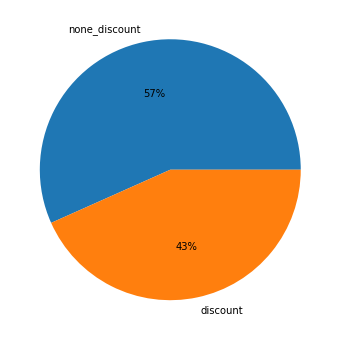

In [ ]:
plt.figure(figsize=(12,6))
keys=["none_discount","discount"]
plt.pie([len(none_discount_data),len(discount_data)],labels=keys, autopct='%.0f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


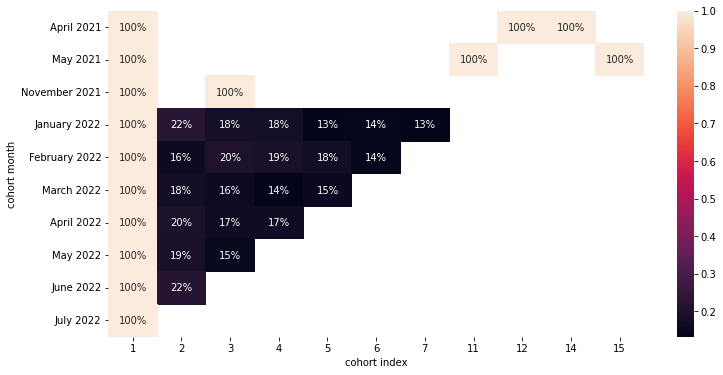

In [ ]:
visual_cohort_table(create_cohort_table_first(first_discount_users))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


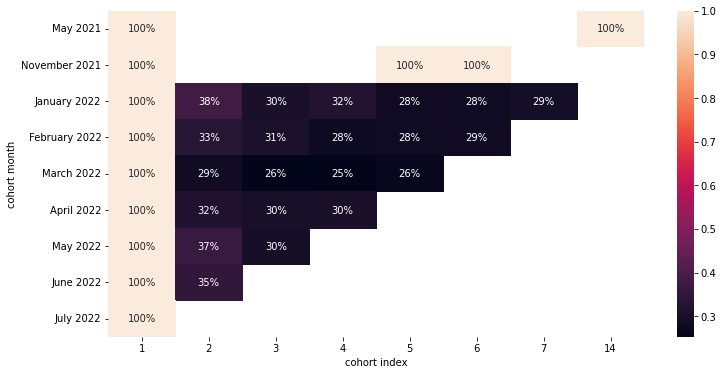

In [ ]:
visual_cohort_table(create_cohort_table_first(first_none_discount_users))

# **discount type**

In [ ]:
discount_type1=discount_data[discount_data["discount_type"]==1]
#first_discount_type1=discount_type1.groupby("user_id")["created_at"].agg('min').reset_index()
first_discount_type1_users=data[data["user_id"].isin(discount_type1["user_id"])]

In [ ]:
discount_type2=discount_data[discount_data["discount_type"]==2]
#first_discount_type2=discount_type2.groupby("user_id")["created_at"].agg('min').reset_index()
first_discount_type2_users=data[data["user_id"].isin(discount_type2["user_id"])]

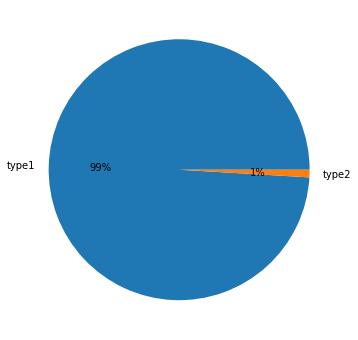

In [ ]:
plt.figure(figsize=(12,6))
keys=["type1","type2"]
plt.pie([len(discount_type1),len(discount_type2)],labels=keys, autopct='%.0f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


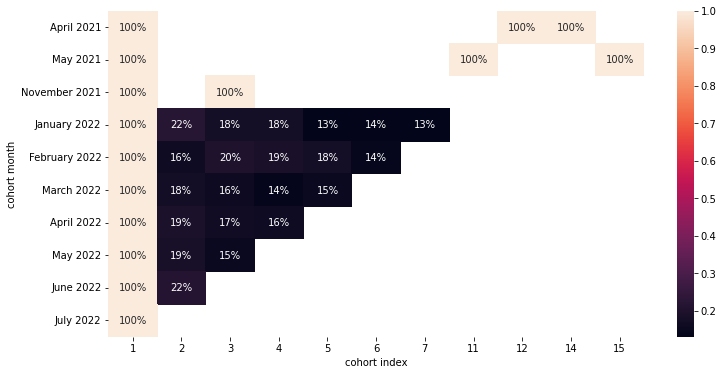

In [ ]:
visual_cohort_table(create_cohort_table_first(first_discount_type1_users))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


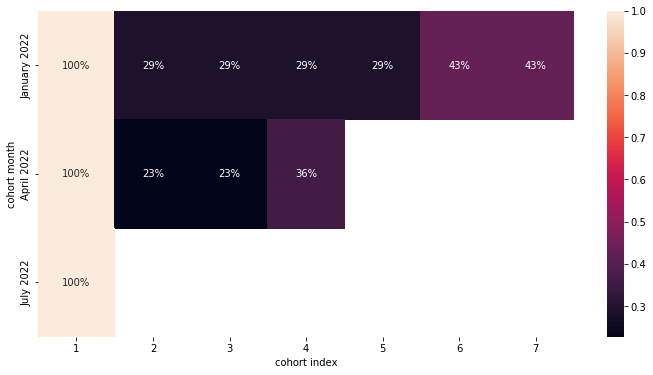

In [ ]:
visual_cohort_table(create_cohort_table_first(first_discount_type2_users))

# **discount price**

In [ ]:
discount_data

,user_id,created_at,order_id,discount_cost,discount_type,basket,month,cohort month
0,1,2021-04-12,1,10000,1.0,12000,2021-04-01,2021-04-01
2,3,2021-05-09,3,10000,1.0,14000,2021-05-01,2021-05-01
4,5,2021-11-10,5,10000,1.0,16000,2021-11-01,2021-11-01
7,8,2022-01-01,8,10000,1.0,10000,2022-01-01,2022-01-01
10,11,2022-01-01,11,15000,1.0,21000,2022-01-01,2022-01-01
...,...,...,...,...,...,...,...,...
10083,9970,2022-07-31,28969,15000,1.0,20000,2022-07-01,2022-07-01
10084,9971,2022-07-31,28971,15000,1.0,15000,2022-07-01,2022-07-01
10087,9974,2022-07-31,28986,10000,1.0,20000,2022-07-01,2022-07-01
10091,9978,2022-07-31,29023,10000,1.0,24000,2022-07-01,2022-07-01


In [ ]:
discount_data["discount index"]=discount_data["discount_cost"]//5000 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
discount_price_counts=discount_data.groupby("discount index")["user_id"].agg(count).reset_index()

In [ ]:
sorted_discount=discount_price_counts.sort_values(by=["user_id"],ascending=False)

In [ ]:
sorted_discount

,discount index,user_id
2,2,2904
3,3,1232
1,1,193
0,0,28
4,4,11
6,7,3
5,5,2
7,8,2


Text(0, 0.5, 'Order count')

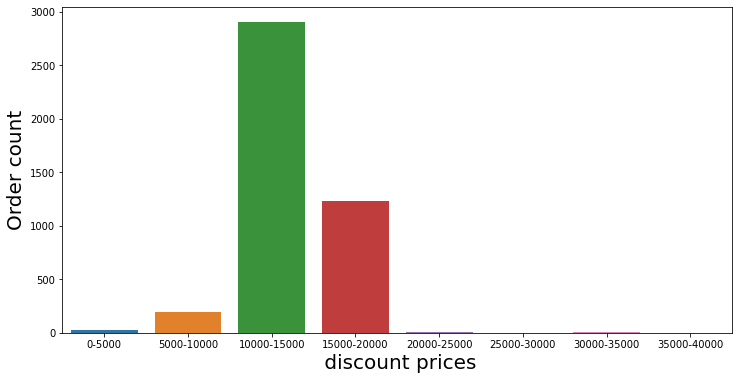

In [ ]:
plt.figure(figsize=(12,6))
p=sns.barplot(x=sorted_discount["discount index"].values ,y=sorted_discount["user_id"].values)
p.set_xticklabels(['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000',"35000-40000"])
p.set_xlabel(" discount prices", fontsize = 20)
p.set_ylabel("Order count", fontsize = 20)


In [ ]:
discount_data["discount percentage index"]=((discount_data["discount_cost"]/(discount_data["basket"]+discount_data["discount_cost"]))*100)//10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
discount_price_counts=discount_data.groupby("discount percentage index")["user_id"].agg(count).reset_index()

In [ ]:
sorted_discount=discount_price_counts.sort_values(by=["user_id"],ascending=False)

In [ ]:
sorted_discount

,discount percentage index,user_id
4,4.0,1299
3,3.0,1077
5,5.0,823
2,2.0,703
6,6.0,259
1,1.0,198
0,0.0,16


Text(0, 0.5, 'Order count')

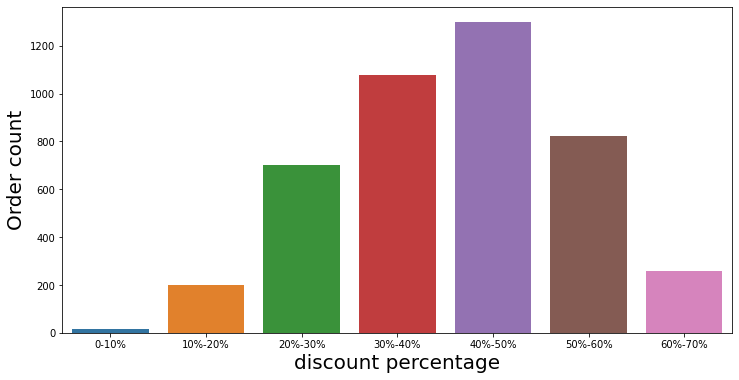

In [ ]:
plt.figure(figsize=(12,6))
p=sns.barplot(x=sorted_discount["discount percentage index"].values ,y=sorted_discount["user_id"].values)
p.set_xticklabels(['0-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-60%','60%-70%',])
p.set_xlabel("discount percentage", fontsize = 20)
p.set_ylabel("Order count", fontsize = 20)


In [ ]:
avg_discount_prices=sum(discount_data["basket"].values)

In [ ]:
avg_none_discount_prices=sum(none_discount_data["basket"].values)

Text(0, 0.5, 'Revenue')

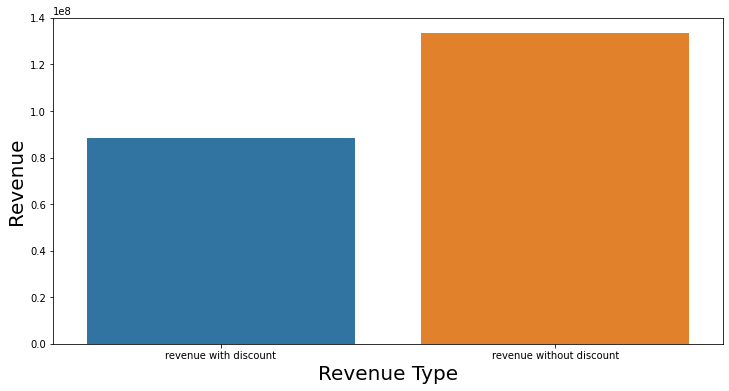

In [ ]:
plt.figure(figsize=(12,6))
p=sns.barplot(x=["revenue with discount","revenue without discount"],y=[avg_discount_prices,avg_none_discount_prices])
p.set_xlabel("Revenue Type", fontsize = 20)
p.set_ylabel("Revenue", fontsize = 20)


# **customer purchase latency**

In [ ]:
def get_next_value(df, group, column):
    df = df.copy()
    return df.groupby([group])[column].shift(1)

In [ ]:
df_orders = data.sort_values(by=['created_at'], ascending=False)
df_orders['next_order_date_0'] = get_next_value(df_orders, 'user_id', 'created_at')

NameError: ignored

In [ ]:
for i in range(9):
  df_orders['next_order_date_'+str(i+1)] = get_next_value(df_orders, 'user_id', 'next_order_date_'+str(i))

In [ ]:
def get_days_since_date(df, before_datetime, after_datetime):
    df = df.copy()
    df[before_datetime] = pd.to_datetime(df[before_datetime])
    df[after_datetime] = pd.to_datetime(df[after_datetime])
    diff = df[after_datetime] - df[before_datetime]
    return round(diff / np.timedelta64(1, 'D')).fillna(0).astype(int)

In [ ]:
df_orders['days_since_prev_order_0'] = get_days_since_date(df_orders, 'created_at', 'next_order_date_0')

In [ ]:
for i in range(9):
  df_orders['days_since_prev_order_'+str(i+1)] = get_days_since_date(df_orders, 'next_order_date_'+str(i), 'next_order_date_'+str(i+1))

In [ ]:
latency_tabel=pd.merge(first_table, df_orders, how='left').reset_index()

In [ ]:
latency_tabel = latency_tabel.replace(0, np.NaN)

In [ ]:
latency_tabel_mean=round(latency_tabel.iloc[:,19:28].mean()).reset_index()

In [ ]:
order_gap=["1th-2th","2th-3th","3th-4th","4th-5th","5th-6th","6th-7th","7th-8th","8th-9th","9th-10"]
latency_tabel_mean["order gap"]=order_gap
latency_tabel_mean["days"]=latency_tabel_mean[0]
latency_tabel_mean.drop(columns=["index",0] )

In [ ]:
plt.figure(figsize=(12,6))
p=sns.barplot(x=latency_tabel_mean["order gap"].values,y=latency_tabel_mean["days"].values)
p.set_xlabel("Order Gap", fontsize = 20)
p.set_ylabel("Days", fontsize = 20)
